In [44]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import feets

In [45]:
#### Uncomment to read-in the data

# # Reading in the data

url = "https://raw.githubusercontent.com/MachineLearningUniandes/MANTRA/master/data/lightcurves/transient_lightcurves.csv"
url1 = 'https://raw.githubusercontent.com/MachineLearningUniandes/MANTRA/master/data/lightcurves/transient_labels.csv'
url2 = 'https://raw.githubusercontent.com/MachineLearningUniandes/MANTRA/master/data/lightcurves/transient_info.txt'
transient_lc = pd.read_csv(url)
transient_labels = pd.read_csv(url1)
transient_info = pd.read_table(url2)


In [46]:
# !pip install feets

In [47]:
transient_info = pd.read_table(url2)

transient_info.head()

,#CRTS ID,RA (J2000),Dec (J2000),UT Date,Mag,CSS images,SDSS,Others,Followed,Last,LC,FC,Classification
0,CSS120828:000010-215515,0.04323,-21.92087,20120828.38,17.02,1208280210014111715,no,11171,no,2016-10-22,11171,yes,Var
1,CSS100910:000025+332543,0.10280,33.42861,20100910.42,15.85,1009101320014148188,yes,14818,no,2016-11-05,14818,yes,"CV SDSS mag 20,5"
2,CSS101127:000130+050624,0.37695,5.10657,20101127.21,15.68,1011271040014129121,no,12912,yes,2016-11-06,12912,yes,"CV mag 20,0"
3,CSS160709:000132+211336,0.38474,21.22680,20160709.45,17.21,1607091210014124380,yes,12438,no,2016-11-05,12438,yes,Blazar CRATES_J0001+2113
4,CSS110926:000156+065236,0.48205,6.87665,20110926.30,19.35,1109261070014122864,no,12286,yes,2016-11-06,12286,yes,"SN 2011hl SDSS mag 15,7 2MASX_00015920"


In [48]:
# plt.plot(transient_info['Mag'],transient_info['UT Date'],'.')

In [49]:
# Removing the datasests or labels with uncertain labels [e.g '/', '?', 'not Unclear']

uncertain = ['/','?']

newlabel = []
for i in range(len(transient_labels.Classification)):
    
    if transient_labels.Classification[i] == 'Unclear':
        
        newlabel.append(i)
    
    for k in transient_labels.Classification[i]:
        
        
        if k in uncertain:
            
            
            newlabel.append(i)
            
# print(len(newlabel))                    
# Getting unique indices since some are duplicated        
newlabel = np.unique(newlabel)


# Removing the indices stored in the list above from
# the transient_label data

# print(len(newlabel))
new_transient_label = transient_labels.drop(newlabel)

sm = 0
for lb in np.unique(transient_labels.Classification.iloc[newlabel]):
    
    x = transient_labels[transient_labels['Classification']==lb]
    sm+=1
#     print(lb,len(x))

In [50]:
# Linking the classes with specific light curve using IDs
import re 
s = str(transient_lc.ID.iloc[20])
ss=int(re.sub(r'[A-Z a-z]+', '', s, re.I)) 
    
z = [int(i) == ss for i in new_transient_label.TransientID]
True in z
# print(int(new_transient_label.TransientID[0]),ss)

True

# Plotting a pie chat/bar graph of the classes in the data

In [51]:
len(new_transient_label)

# len(new_transient_label.TransientID.unique()

4660

In [52]:
new_transient_label.head()

,Classification,TransientID
0,Flare,1611101400424116462
1,HPM,1611101210274176502
2,HPM,1611101150154137989
3,HPM,1611091630244128695
4,CV,1611091600294129774


NameError: name 'results_dir' is not defined

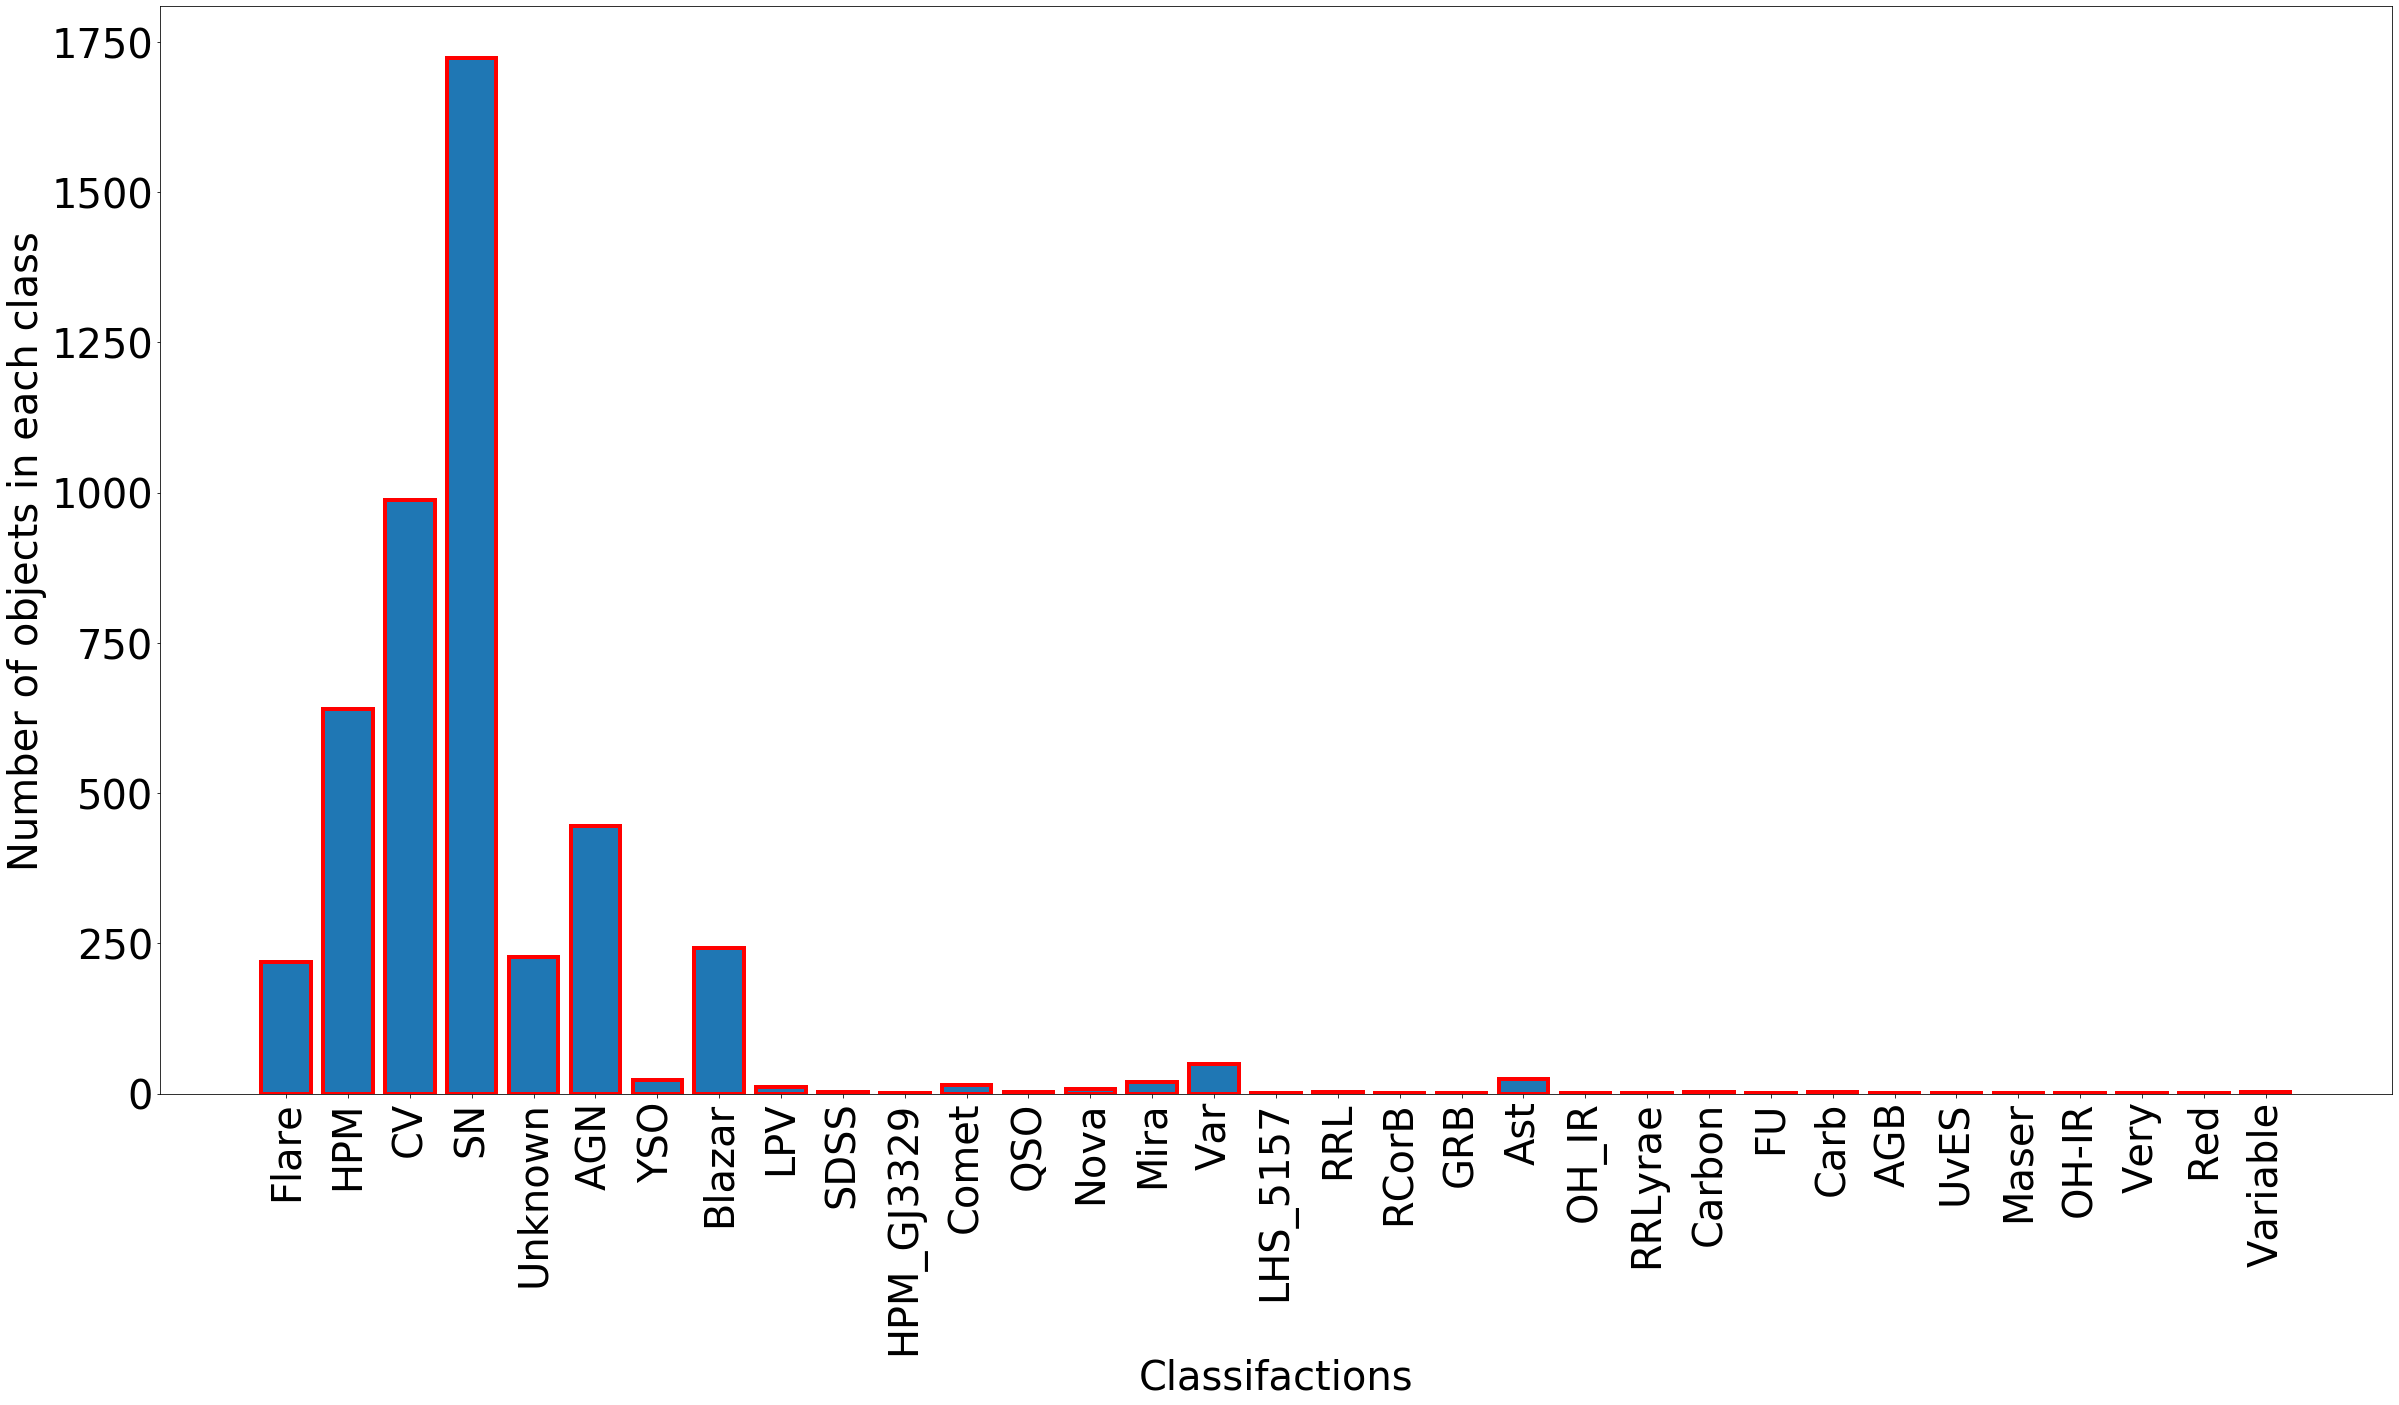

In [53]:
unique_labels=new_transient_label.Classification.unique()
len_labels = []
for i in unique_labels:
    x = new_transient_label[new_transient_label['Classification']==i]
    len_labels.append(x)


label_len = []
for i in range(len(len_labels)):
    
    label_len.append(len(len_labels[i]))
    


# plt.style.use('classic')

# plt.rcParams.update({'font.size': 20})
# plt.figure(figsize=(16,4))
plt.rcParams.update({'font.size': 40})
plt.figure(figsize=(40,20))

plt.bar(unique_labels,label_len, width=0.8,edgecolor='r',linewidth=4)
plt.xticks(rotation=90)
plt.xlabel('Classifactions')
plt.ylabel('Number of objects in each class')
# plt.tight_layout()
plt.savefig(results_dir +'filter_class_bar.png',bbox_inches="tight",edgecolor='y',quality=100)
plt.tight_layout()
plt.show()

In [ ]:
for i in range(len(unique_labels)):
    
    if unique_labels[i]=='Var':
        
        print('Number of unknown transients = {}'.format(label_len[i]))
        
# len(unique_labels)

In [ ]:
# plt.pie?

# Getting Unique IDs from the data

In [ ]:
transient_lc.shape

In [ ]:
transient_lc.head()

In [ ]:
unique_ID=transient_lc.ID.unique()
print(len(unique_ID))
unique_ID

In [ ]:
# # Getting the Unique ID and storing them in a list

# unique_ID = []

# for k in range(1,len(transient_lc.ID)):

#     if transient_lc.ID.iloc[k-1] != transient_lc.ID.iloc[k]:

#         unique_ID.append(transient_lc.ID.iloc[k-1])

# # Appending the last data since the loop above goes
# # up to len(lc.ID)-1
# unique_ID.append(transient_lc.ID.iloc[-1])

In [ ]:
Lc_len = [] # List to store the duration of the lc

d = []      # List to store data for a unique ID as
            # by the code above

    
#  Storing the datasets of the unique ID in a the 'd' 
#  list
for i in unique_ID:
    
    z = transient_lc[transient_lc['ID']==i]
    d.append(z)
    
    # calculating the duration of the lcs
    Lc_len.append(np.sort(z.MJD)[-1] - np.sort(z.MJD)[0])
    



# Ploting first 4 light curves of the unique IDs

In [ ]:
unique_ID

In [ ]:
# Plotting light curves for the first 4 unique IDs as by the code above
random_lc = np.random.normal(0,len(unique_ID),5)
plt.rcParams.update({'font.size': 20})
for i in range(0,3):
    plt.figure(figsize=(16,4))
    plt.errorbar(d[i].MJD,d[i].Mag,yerr=d[i].Magerr,
                 fmt='.r',color='r')

    plt.xlabel('MJD')
    plt.ylabel('Mag')
    plt.savefig(results_dir +'Light_Curve'+str(i)+'.png',bbox_inches="tight")
    plt.show()

# Plotting a histogram with the light curve durations

In [ ]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(16,4))

plt.figure(figsize=(12,6))
plt.hist(Lc_len,color='red',alpha=0.6, bins=20)
plt.xlabel('Duration of the light curves [MJD]')
plt.ylabel('Counts')
plt.yscale('log')
plt.savefig(results_dir +'lc_duration.png',bbox_inches="tight")
plt.show()
np.average(Lc_len)

# Zero light curve length



* From the plot above we can see that several light curves (lc) have zero lengths


* The code below investigates this light curves in detail


* We have found that the light curves with zero lengths have a single point in their observations


* The paper does not say anything about this light curves

In [ ]:
# Saving indeces where the light curve 
# length/duration is zero.
Zero_Lenth_lc = []
for i in range (len(Lc_len)):
    
    if Lc_len[i] == 0: 
        Zero_Lenth_lc.append(i)
        
# Checking the indices in obtained above
# in the original data

d[Zero_Lenth_lc[0]] 

print('Number of transients = {} according to the code above'.format(len(unique_ID) - len(Zero_Lenth_lc)))

In [ ]:
len(Zero_Lenth_lc)